# <center> Numerical Physics with Probabilities: Bayesian Statistics

    
    
<center> Department of Physics, University of Surrey module: Energy, Entropy and Numerical Physics (PHY2063)

## Table of Contents:

* [Numerical Physics part of Energy, Entropy and Numerical Physics](#EENP-intro)
* [Introduction to Bayesian Probability](#bayes-intro)
* [Bayesian Statistics](#bayesian-statistics)
* [Starting estimate: the Prior probability density, $p_0$](#Prior-Probability)
* [Bayes' Theorem](#Bayes-Theorem)
* [Coding Bayes' Theorem](#Coding-Bayes)

#### Learning Objectives:

> Learn background to both Frequentist and Bayesian inference 

> Learn basics of conditional probabilities and why Bayesian Statistics is important

> Develop understanding of, and how to code, an example demonstrating using Bayes' Theorem


## 1) Numerical Physics part of Energy, Entropy and Numerical Physics <a class="anchor" id="EENP-intro"></a>

This numerical physics course is part of the second-year
Energy, Entropy and Numerical Physics module.
It is online at the EENP module on SurreyLearn.
See there for assignments, deadlines etc.
The course is about numerically solving ODEs (ordinary differential equations) and
PDEs (partial differential equations), and introducing the (large)
part of numerical
physics where probabilities are used.

This assignment is on numerical physics of probabilities, and
looks at the Monte Carlo (MC) method, a section of fitting techniques, section on uncertainty estimates and
at the Bayesian statistics approach to data analysis. 
It covers MC, uncertainty, fitting and Bayesian statistics, in that order, across 4 notebooks.

Bayesian statistics is a powerful data analysis method, and
is used everywhere from particle physics to spam-email filters.
Data analysis is fundamental to science.
For example, analysis
of the data from the Large Hadron Collider was required
to extract a most probable value for the
mass of the Higgs boson, together with an estimate of the region of masses
where the
scientists think the mass is.
This region is typically expressed as a range of mass
values where the they think the true mass lies with high (e.g., 95%) probability.

Many of you will be analysing data (physics data, commercial data, etc) for
your PTY or RY, or future careers. And some will using MC or related modelling techniques.

(Davenport and Patil, in the Harvard Business Review,
called the job of data scientist "the sexiest job of the 21st century"
https://hbr.org/2012/10/data-scientist-the-sexiest-job-of-the-21st-century )


## 2) Introduction to Bayesian Probability <a class="anchor" id="bayes-intro"></a>

This section has follows on from some of the content that was covered in the Monte Carlo methods and probability workbook, as Bayesian inference is a widely used statistical technique. It builds upon some of the fundamental concepts of probability that were discussed earlier.

Bayesian probability is an interpretation on the nature of probability, so rather than being a direct measure of the liklihood of some phenomenon, probability is interpretted as reasonable expectation representing a state of knowledge. This sounds complicated but what it really means is simply that for a hypothesis which may or may not be true it has a probability assigned to it, and as new information is discovered the certainty of the hypothesis changes. The alternative to this being the frequentist approach which usually tests a hypothesis without assigning a probability to the hypothesis, we won't be covering frequentist inference in this notebook although you will have already used it even if you weren't aware at the time. If you would like to learn more on it see the wikipedia page, https://en.wikipedia.org/wiki/Frequentist_inference.

## 3) Bayesian Statistics <a class="anchor" id="bayesian-statistics"></a>

In a physics experiment you are usually trying to measure a physical quantity
as accurately as possible.
This might be, for example, the mean lifetime $\tau$
of a radioactive isotope. It could also
be one of millions of other measurable quantities: the
mass of a star, the mass of a fundamental particle etc etc.
Typically, at the start of the experiment you have a rough
idea of the lifetime $\tau$,
and you want to use the
results of your experiments to improve
upon this initial rough guess. You want
to not only obtain an accurate estimate of the value of $\tau$, 
but also to obtain an error estimate. This
error estimate should give you as much information about
the uncertainty in your estimate for $\tau$ as possible.

Bayes' Theorem is one of the best ways of incorporating
new knowledge into an existing estimate of the value of a variable so that
our uncertainty in this value is reduced by the new data.
This idea is essentially
something we use informally all the time but without the maths.
For example, if I tell you that $X$ is a footballer then the
probability that they are a forward is about $2/11$ 
(assuming a 4-4-2 formation) but if I tell you that
they scored 20 goals last season then presumably the footballer is either
a forward or an attacking midfielder and so now you would update your estimate
and say that
the probability that they are a forward is about $1/2$. Bayes'
theorem takes this basic idea and converts it into an equation.

We are going to learn how to use Bayes' Theorem via a simple example.

### 3.1) Example problem: Estimating the lifetime of an unstable isotope

If a radioisotope has a lifetime of $\tau$ s,
the probability that after $t$ s, the isotope has not
decayed is

$$
P(t)=\exp\left(-t/\tau\right)
$$

and the probability that the isotope survives to a time $t$ s,
and then decays between $t$ and $t+{\rm d}t$s is $p(t){\rm d}t$.
This defines $p(t)$, which is essentially the instantaneous probability density
of the isotope decaying at time $t$. $p(t)$ 
is just the negative of the derivative of $P(t)$, i.e.,

$$
p(t)=-\frac{{\rm d}P(t)}{{\rm d}t}=\tau^{-1}\exp(-t/\tau)
$$

As $p(t)$ is a probability density function, it is normalised, i.e.,
its integral over all times equals 1

$$
\int_0^{\infty}p(t){\rm d}t=1
$$

this is just because the decay happens with probability 1, between
time equals zero and infinity.

Note - The isotope's half life, $t_{1/2}$, is related to
its lifetime $\tau$, by $t_{1/2}=(\ln 2)\tau$

### 3.1.1) Conditional probabilities

We now need to introduce the idea of a conditional probability or
conditional probability density.
Conditional probabilities are
the probability of one thing, given that another thing is true,
e.g., probability of $A$ given $B$ is written $p(A|B)$ --
note the $|$ between the $A$ and $B$, and the order of $A$ and $B$.
Here, we note that the probability density of a decay occurring 
at time $t$ is a conditional probability as it depends
on $\tau$, so we note that and write

$$
p(t|\tau)=\tau^{-1}\exp(-t/\tau)
$$

which is the probability density for the decay
of a radioisotope at
a time $t$, given that the lifetime of the isotope is $\tau$.

The point here is that $p(t|\tau)$ is the wrong way round for us.
It tells us how probable it is that we will observe a decay
at a time $t$, providing we know the lifetime.
But in experiment we don't measure $\tau$, we measure $t$ and then want
to use those measurements to estimate the value of $\tau$.
What we want is not $p(t|\tau)$ but $p(\tau|t)$. Bayes' theorem
will allow us to estimate this.

Now that we know what conditional probabilities are, we need to look at how
we can make our initial rough estimate for the value for $\tau$ into
an equation.

## 3.2) Starting estimate: the Prior probability density, $p_0$ <a class="anchor" id="Prior-Probability"></a>

At the start of the experiment, before making any measurements,
we must have some idea of what the true value, $\tau_{TRUE}$, of the lifetime is. If
we had no idea what the value of $\tau_{TRUE}$
is we could not design an experiment to estimate its value
as we would not know if our detector needed a time resolution of
nanoseconds, seconds, days, millenia, etc.

Our rough estimate of the value of $\tau$, the one we have at the
start of the experiment is expressed by what is called a prior
probability density function, $p_0(\tau)$. This is our best guess
for the probability density function at the start.
$p_0$ is often just called the prior.

For example, we may think that $\tau$
is somewhere in the range $\tau_{MIN}$ to $\tau_{MAX}$, i.e.,
greater than $\tau_{MIN}$ but less than $\tau_{MAX}$.
Then if we know nothing more than that we can start
with a prior probability density function of

\begin{array}{cc}
0 &  \tau < \tau_{MIN}~{\rm s}  \\
\frac{1}{\tau_{MAX}-\tau_{MIN}}~{\rm s}^{-1} & \tau_{MIN}\le \tau \le \tau_{MAX}~{\rm s} \\
0 &  \tau_{MAX}~{\rm s} < \tau 
\end{array}

This is uniform from $\tau_{MIN}$ to $\tau_{MAX}$ s and zero outside that range.
In this range $p=1/(\tau_{MAX}-\tau_{MIN})$s$^{-1}$ because
the integral over $p_0$ must equal one as it is a probability
density function.
We have taken $p_0$ to be uniform between $\tau_{MIN}$ and $\tau_{MAX}$,
because in the absence of any more information, we have no reason to
make the probability density of $\tau$ higher in one part of the range, than
in another. 


Plots of the probability distribution function for the estimated lifetime
$\tau$ of a radioactive isotope.
The dotted curve is $p_0(\tau)$, the prior probability
distribution function, that before any measurements
are taken.
The dashed curve is after one measurement has been taken and
this observed a decay at a time $t_1=8.954$~s.
The solid curve is after ten measurements have been taken.
%This gives a most probable lifetime of 12.8 s,
%a mean lifetime of 16.0 s and a standard deviation of $p(\tau)$ of 6.1 s.



## 3.3) Bayes' Theorem <a class="anchor" id="Bayes-Theorem"></a>

If our first measurement of a radioisotope decay is at a value $t=t_1=8.954$ s,
then what we want is the probability $p(\tau|t_1)$:
the probability that the isotope lifetime equals $\tau$,
given that we have observed a decay at a time $t_1$. 
This is given by Bayes' Theorem, which is

<br>
<center>
$p(\tau|t_1)\propto p(t_1|\tau)p_0(\tau)
~~~~~~~~~\mbox{Bayes' Theorem}$
</center>

In words: after a decay at a time $t=t_1$, the probability that
the lifetime has the value $\tau$ is proportional
to the probability that it had the value $\tau$ before we made the
measurement (the prior $p_0(\tau)$), times the probability that
a source with lifetime $\tau$ would give a decay at $t=t_1$.
For the background to this equation, you can look up the Wikipedia page
on Bayesian Inference, or one of many statistics textbooks. Many
textbooks discuss Bayesian statistics. https://en.wikipedia.org/wiki/Bayesian_inference

 
An example demonstrating this can be seen in the image below, (the scenario this graph is describing is 
an archaeologist determining the age of the historical site based on the pottery fragments
that they find), note that the initial
(after 0 trials) is a horizontal line. Then as more measurements are taken it is 
apparent that the true value is nearer to 15th century and thus the probability 
density function reflects this. However there is still uncertainty on the exact value
and so more measurements can be taken to reduce this, so this we can see by the graph 
having a steeper peak after 50 measurements than after 10.

If we make successive measurements of decay times at
$t_1, t_2, t_3,\dots , t_n$, i.e., we have a set of measurements
$\{t_i\}$, then Bayes' Theorem is

<br>
<center>
$p\left(\tau |\{t_i\} \right)\propto
p_0\left(\tau\right)\Pi_{i=1,n}  p(t_i|\tau)
~~~~~~~\mbox{Bayes' Theorem -- multiple measurements}$
</center>


Note that $\Pi_{i=1,n}$ indicates a product, i.e., we multiply
all the $p(t_i|\tau)$ together.
Introducing a proportionality constant $c$ we have that

<br>
<center>
$p\left(\tau |\{t_i\} \right)=c
p_0\left(\tau\right)\Pi_{i=1,n}  p(t_i|\tau)$
</center>

and $c$ is obtained by noting that the integral over
$p\left(\tau |\{t_i\} \right)$ must equal one.
This is the basic equation we need to convert into python to
allow us to do Bayesian statistics on a computer.

It is worth noting that the more measurements
we make the more information we have and the more accurate is
our estimate for the lifetime (or century prediction in the case of the graph). But 
there is always some uncertainty in the true value, i.e.,
there will always be error bars.

![Image of Bayesian Inference](https://upload.wikimedia.org/wikipedia/commons/6/6d/Bayesian_inference_archaeology_example.jpg)

### 3.3.1) Normalising a probability density function

Often we are in the situation that we have computed a function, $p'(x)$,
that is almost a probability density
function but is not normalised, i.e., the true probability density
function $p(x)=cp'(x)$, where $c$ is an unknown constant.
Normalising $p'(x)$ to get $p(x)$ takes just two steps, first integrate
$p'$ to obtain the integral $I$. Then just divide $p'$ by $I$ to get $p$,
i.e., $p(x)=p'(x)/I$.

Integration is easy to to do on a computer. If in python we
write the integral
$I$, as ${\tt norm\_const}$, and if the function $p'(x)$ is
in the array ${\tt p}$, then 

$$
{\tt norm\_const=(sum[p]-0.5*(p[0]+p[m]))*dx}
$$

where the array ${\tt p}$ has elements ${\tt i=0}$ to ${\tt m}$.
Also ${\tt dx}$ is the spacing along the $x$ axis between successive
elements in the array ${\tt p}$. So this is the first step.
The built-in Fortran ${\tt sum}$ takes an array and sums up all its elements.

The second step is just

$$
{\tt p=p/norm\_const}
$$

and then ${\tt p}$ is a normalised probability density function (in an array).
Note that we coud have defined two arrays ${\tt p}$ and ${\tt pdash}$, and
have ${\tt pdash}$ as the unnormalised one and ${\tt p}$ as the final normalised
one. That would also work.

## 3.4) Coding Bayes' Theorem <a class="anchor" id="Coding-Bayes"></a>

Here we will see how to write a program to take an array ${\tt decay\_meas\_t}$
with 10 measured decay times, and use it to obtain a
probability density for the decay time, $p(\tau)$. These 10 measured
decay times are in a file you can download from SurreyLearn onto your computer.
Your program should then read these 10 numbers in from the file.

We will need to discretise the $\tau$ axis in order to represent
the functions $p_0(\tau)$ and  $p\left(\tau |\{t_i\} \right)$
by one-dimensional arrays ${\tt prior}$ and ${\tt p}$.
We will also need a corresponding array of $\tau$ values:
${\tt tau\_arr}$.
In our case the prior will be zero outside the range from $\tau_{MIN}=$1 to
$\tau_{MAX}=100$s, so
a suitable step to discretise the $\tau$ axis is
${\tt dtau=0.1}$. Then if we define arrays of size ${\tt 0}$ to ${\tt m=1050}$

\begin{eqnarray}
&&{\tt  prior = np.zeros(1050)}\nonumber\\  
&&{\tt  tau\_arr = np.arange(0.1,105.1,dtau)}\nonumber
\end{eqnarray}

these will span the range $\tau=0$ to 105~s -- the range from $\tau_{MIN}$
to $\tau_{MAX}$ plus some extra at either end.
With ${\tt dtau=0.1}$, the array ${\tt tau\_arr}$ has elements
${\tt tau\_arr(i)=real(i)*dtau}$.

The prior array should be set, which means you put the values you need to,
into the array.
You can then input the prior straight into the array ${\tt p}$, however make sure
you aren't just creating a pointer to the same memory address else you may struggle
to plot prior at the end.

$$
{\tt p=prior}
$$

Now you are ready to improve the array ${\tt p}$ using Bayes' Theorem.
To update the array element ${\it i}$ in array ${\tt p}$
for the point at ${\tt tau\_arr(i)}$, we need

$$
{\tt p[i]=p[i]*exp(-decay/tau\_arr[i])/tau\_arr[i]}
$$ 

Now looping over $i$ updates the whole array ${\tt p}$ for one measured decay time,
${\tt decay}$. Looping over ${\tt decay}$ then updates the array
${\tt p}$ for all 10 measurements, the loop would be along the lines of 
${\tt for~decay~in~decay\_meas\_t}$. In other words you need 2 nested for loops.

Finally, all you then need to do is normalise the array ${\tt p}$.
This array is the probability
distribution function for the decay time $\tau$, that
incorporates the information provided by the 10 measured decay times.

In [20]:
# coding bayes' theorem
import numpy as np
bayes_vals =[8.954, 36.403,7.060,5.701,2.914,11.974,13.205,22.668,1.615,32.939]

dtau = 0.1
tau_min = 1
tau_max = 100
prior = np.zeros(1050)
tau_arr = np.arange(0.1,105.1,dtau)

prior[10:1001] = 1/(tau_max-tau_min)
# need to build array else you make a pointer to the same variable which gives you wrong prior at the end
p = np.array(prior)

for decay_time in bayes_vals:
    for i in range(len(p)):
        p[i] = p[i]*np.exp(-decay_time/tau_arr[i])/tau_arr[i]
   

norm_const = (sum(p) - (0.5*(p[0]+p[-1]))) * dtau
p = p/norm_const

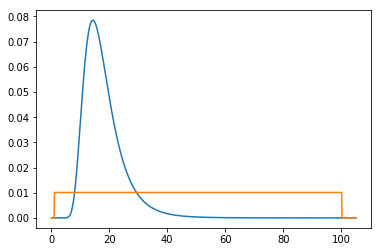

In [21]:
from matplotlib import pyplot as plt

plt.plot(tau_arr, p)
plt.plot(tau_arr, prior)
plt.show()